# Data Exploration and Visualization (Training set)

In the first section I will investigate the features (looking for <i>missing values</i>, <i>fill missing values</i>, <i>correlation</i> between features etc.) one by one to decide which feature has useful information to solve the main problem. 

In [1811]:
#Data Analysis
import pandas as pd
import numpy as np

In [1812]:
#Data Visualization
%pylab inline

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


c:\users\péter\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1813]:
train = pd.read_csv('DA_titanic_train.csv')

In [1814]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can see that numeric features have widely different ranges so we need to convert them to the same scale.

Lets get a full description of the training set

In [1815]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,624.000000,624.000000,624.000000,624,624,494.000000,624.000000,624.000000,624,624.000000,128,623
unique,NaN,NaN,NaN,624,2,NaN,NaN,NaN,516,NaN,104,3
top,NaN,NaN,NaN,"Reed, Mr. James George",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,396,NaN,NaN,NaN,5,NaN,4,447
mean,459.128205,0.383013,2.328526,NaN,NaN,29.658745,0.519231,0.354167,NaN,30.523470,NaN,NaN
std,257.314092,0.486511,0.822684,NaN,NaN,14.770773,1.071871,0.775559,NaN,48.186064,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,241.750000,0.000000,2.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,460.500000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,13.931250,NaN,NaN
75%,683.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,30.000000,NaN,NaN


We can see that there are <b>624 passengers</b>, but only <b>494 age values</b>, <b>128 cabin values</b> and <b>623 embarked values</b>. Let's summarize the number and percentage of missing values for each feature.

In [1816]:
total_number_of_missing_values = train.isnull().sum().sort_values(ascending = False)
percentage = train.isnull().sum()/train.isnull().count()*100
percentage = (round(percentage,1)).sort_values(ascending = False)
missing_values = pd.concat([total_number_of_missing_values, percentage], axis = 1, keys = ['Total', '%'])

In [1817]:
missing_values

,Total,%
Cabin,496,79.5
Age,130,20.8
Embarked,1,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


We <b>can get rid of PassangerId and Ticket</b> columns because they does not contain useful information about the likelihood of survival of the passengers.

<b>Embarked</b> feature has only <b>1 missing value</b>, <b>age</b> feature has <b>130 missing values</b> and <b>cabin feature</b> has <b>496 missing values (79.5 %)</b>. 

We could _ignore missing values_ or _fill them_. If we decide to fill the missing values then we have to choose filling method wisely in order to keep the correlation between features unchanged. I will discuss it in deeper details later on.

<b>Some most commonly used filling methods:</b>
<ul>
<li>Replace missing values in a column with the mean value of the actual column</li>
<li>Use most common value of the column containing missing value/values to replace them. </li>
</ul>

<b>Other options to deal with missing values:</b>
<ul>
    <li>Drop the row/rows with missing value(s)</li>
    <li>Encode a feature which has a high amount of missing values</li>
</ul>

## Feature Exploration

Let's explore the features one by one.

### SEX

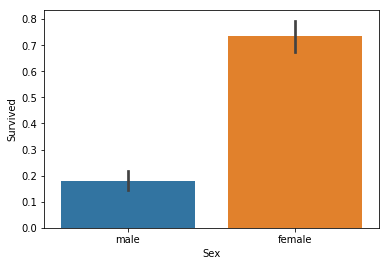

In [1818]:
#Let's investigate the relationship between features in more detail.
sns.barplot(x="Sex", y="Survived", data=train)

It can be noticed that _females were more likely to survive_. This could be because females (and children) were saved first in the disaster.

### AGE

c:\users\péter\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


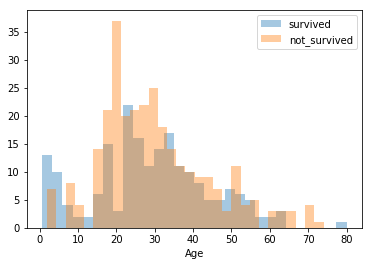

In [1819]:
sns.distplot(train[train['Survived']==1].Age.dropna(), bins=30, label = 'survived', kde = False)
sns.distplot(train[train['Survived']==0].Age.dropna(), bins=30, label = 'not_survived', kde = False)
plt.legend()

This distribution graph is a bit crowded but we can see a pattern in the age distribution.

<ul>
    <li>The majority of survived passengers are aged between 20 and 40 years.</li>
    <li>There is a high spot in the age distribution of survived passengers between age of 0 and 10 years. Which means that children had a higher priority when the security stuff tried to save as much passenger as were possible.</li>
    <li>The majority of dead passengers are also aged between 20 and 40 years.</li>
</ul>

Let's make another type of graph to confirm our conclusions.

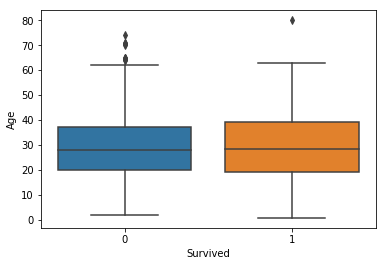

In [1820]:
sns.boxplot(x = 'Survived', y = 'Age', data = train)

This boxplot confrims my conclusions about the previous graph so the majority of survived and dead passengers are aged between 20 and 40 ages. (they can handle dangerous situations more efficiently than older passengers, they have a greater physical and mental health, they took part in rescuing passengers etc.)

c:\users\péter\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


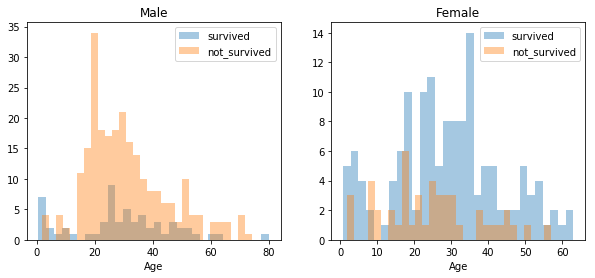

In [1821]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

men = train[train['Sex'] == 'male']
women = train[train['Sex'] == 'female']

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=30, label = 'survived', ax = axes[0], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=30, label = 'not_survived', ax = axes[0], kde = False)
ax.set_title('Male')
ax.legend()

ax_1 = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=30, label = 'survived', ax = axes[1], kde = False)
ax_1 = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=30, label = 'not_survived', ax = axes[1], kde = False)
ax_1.set_title('Female')
ax_1.legend()

Most of the <b>males</b> survived <b>between age of 20 and 40</b> and it is similarly true for females but younger (age of 0-10 years) passengers survived as well which means that infants had higher chance to survive.

_So that, age has a significant effect on the odds of surviving and since we can distinguish different age groups in the age distribution, I will cut ages into different groups._

### PCLASS

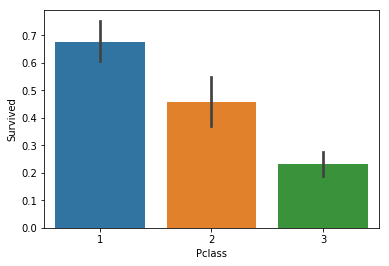

In [1822]:
sns.barplot(x="Pclass", y="Survived", data=train)

People with a higher socioeconomic class are more likely to survive. There is a much higher probability that the person in pclass 3 will not survive.

### EMBARKED

c:\users\péter\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


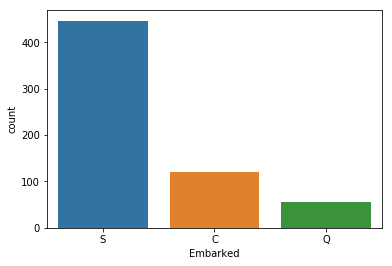

In [1823]:
sns.countplot(train.Embarked)

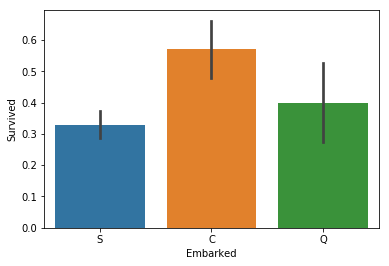

In [1824]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)

Most of the passengers embarkedked at port S and most of the survived passengers embarked port C. 

### SIBSP

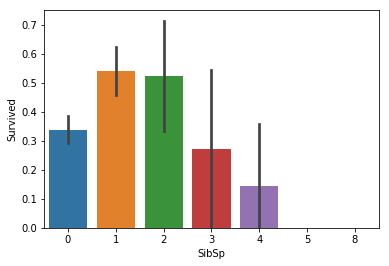

In [1825]:
sns.barplot(x="SibSp", y="Survived", data=train)

There is a higher chance to survive if one has less than 3 siblings/spours.

### PARCH

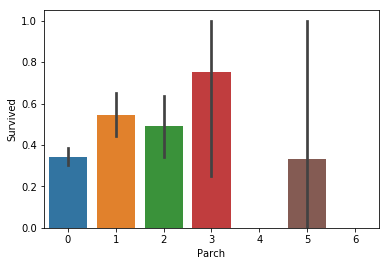

In [1826]:
sns.barplot(x="Parch", y="Survived", data=train)

People with at least 1 parent/children were more likely survived. It could be because they were looking for a way out together. It is less likely to survive if you travel alone. <b> We could introduce two new features called "Alone" (binary) and "Number_of_Relatives" (sibsp + parch) </b>

There is something interesting with the parch = 5 case. I would say it could be related to the age values. To confirm or refuse this theory lets investigate the age values belonging to each parch values.

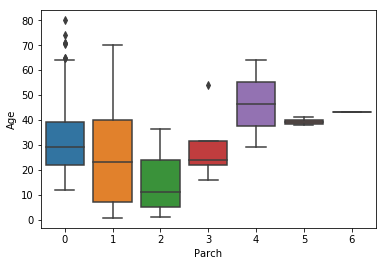

In [1827]:
sns.boxplot(x = 'Parch', y = 'Age', data = train)

We can see that those with 5 parents/children are aged around 40 years which is the upper bound of majority of survivors age. That is why we can see an increasing survival rate at parch = 5. While for parch 4 and 6 the range of age is higher than 40 years. This could be a possible explanation of this phenomenon. 

### PARCH + SIBSP = RELATIVES

In [1828]:
train['Relatives'] = train['Parch'] + train['SibSp']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


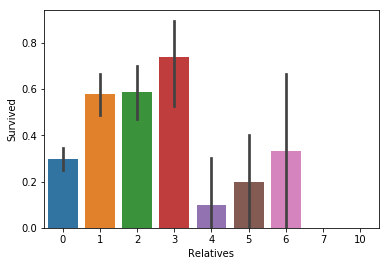

In [1829]:
sns.barplot(x="Relatives", y="Survived", data=train)

We can see from the new barplot that those with 1-3 number of relatives has a higher probability to survive while those who are alone are less likely to survive. --> We could introduce a new feature called  <b>" Not Alone"</b>

### NOT ALONE

In [1830]:
train.loc[train['Relatives'] > 0, 'not_alone'] = 0
train.loc[train['Relatives'] == 0, 'not_alone'] = 1
train['not_alone'] = train['not_alone'].astype(int)

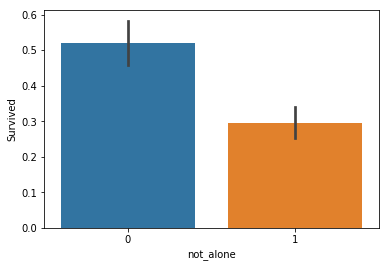

In [1831]:
sns.barplot(x="not_alone", y="Survived", data=train)

It confirms the hypothesis that those who are alone, are less likely to survive

### CABIN

In [1832]:
train.Cabin.unique()

array([nan, 'C85', 'G6', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52',
       'A5', 'D10 D12', 'E101', 'D26', 'D47', 'F2', 'C2', 'E33', 'A7',
       'C49', 'F4', 'A32', 'B80', 'A31', 'E67', 'B94', 'C125', 'C99',
       'B49', 'D', 'B58 B60', 'C22 C26', 'C65', 'E36', 'C54', 'E34',
       'C32', 'C124', 'E40', 'C128', 'D37', 'E50', 'B96 B98', 'D36',
       'C78', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12',
       'E63', 'A14', 'C93', 'C30', 'D20', 'E25', 'F33', 'B18', 'B38',
       'B22', 'A16', 'C101', 'B41', 'D19', 'D50', 'D9', 'A23', 'B35',
       'A26', 'C126', 'B71', 'B51 B53 B55', 'D49', 'C68', 'F G63',
       'C62 C64', 'E24', 'C90', 'F G73', 'C45', 'B5', 'B101', 'D45',
       'D30', 'B77', 'D11', 'E77', 'F38', 'B3', 'B20', 'B82 B84', 'D17',
       'A36', 'E8', 'B102', 'B69', 'B28', 'E49', 'C47', 'D28', 'E17',
       'A24', 'B42'], dtype=object)

The first character of the Cabin values encodes the deck in which the passenger stayed. This is a very important feature in relation of survival chance but too many values are missing so it would be a wise choice to drop the Cabin column. 

In [1833]:
train = train.drop('Cabin', axis = 1)

### FARE

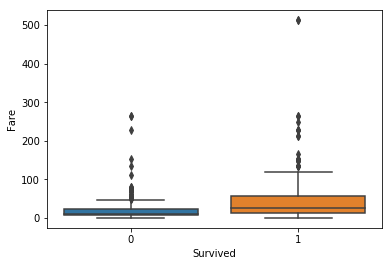

In [1834]:
sns.boxplot(x = 'Survived', y = 'Fare', data = train)

<ul>
    <li>Those who survived payed a higher fare.</li>
    <li>Most of them who payed a higher fare were not alone and not alone means higher chance to survive so it would be a smart decision to introduce a new feature <b>"Fare per person"</b>.</li>
    <li>Fare contains outliers. We have to handle them (for example replace it with the 2nd maximum value, median value or just drop them)</li>
</ul>

In [1835]:
train.Fare.sort_values(ascending = False)

464    512.3292
506    512.3292
297    263.0000
63     263.0000
17     263.0000
219    263.0000
194    247.5208
378    227.5250
251    227.5250
481    227.5250
493    227.5250
502    211.3375
537    211.3375
598    164.8667
173    153.4625
486    151.5500
199    151.5500
336    151.5500
21     146.5208
125    146.5208
174    135.6333
245    135.6333
212    135.6333
218    134.5000
208    134.5000
453    133.6500
260    120.0000
524    120.0000
262    113.2750
200    110.8833
         ...   
496      7.0542
430      7.0542
137      7.0500
620      7.0500
86       7.0500
237      7.0500
541      7.0500
321      7.0458
85       6.9750
558      6.9750
448      6.7500
243      6.4958
130      6.4958
570      6.4500
589      6.4375
213      6.2375
249      4.0125
567      0.0000
574      0.0000
323      0.0000
460      0.0000
560      0.0000
279      0.0000
169      0.0000
175      0.0000
179      0.0000
431      0.0000
196      0.0000
503      0.0000
111      0.0000
Name: Fare, Length: 624,

Remove rows where Fare <= 264.

In [1836]:
train = train[train.Fare <= 264]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0


In [1837]:
train['Fare'] = train.Fare.astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,S,0,1
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S,0,1
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30,C,1,0


### NAME/TITLES

In [1838]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [1839]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,not_alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,S,0,1,Miss
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S,0,1,Mr
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30,C,1,0,Mrs


In [1840]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Ms', 'Major',
       'Lady', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'],
      dtype=object)

There are some most common titles like Mr, Mrs, Miss, Master, Dr. And group the rest as "others"

In [1841]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Other": 6}

train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train['Title'] = train['Title'].map(titles) # Encode titles with numbers

train= train.drop(['Name'], axis=1)

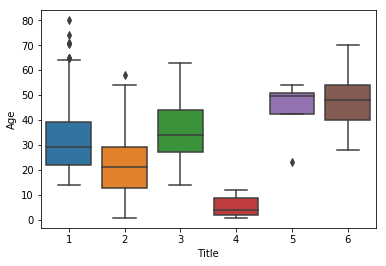

In [1842]:
sns.boxplot(x = 'Title', y = 'Age', data = train)

Since there is a correlation between age and survival, we can have an intuition about which title had the greater chance to survive. Children and others aged between 20-40 years survived the most --> We can conclude that Mr (1), Miss(2), Mrs(3), Master(4) had a greater chance of survival.

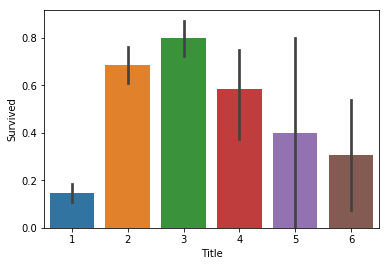

In [1843]:
sns.barplot(x = 'Title', y = 'Survived', data = train)

This plot almost confirms my theory about the relationship of survival and titles. 

## DATA CLEANING , DATA IMPUTATION, DATA MANIPULATION

Let's drop _Ticket_ column because this does not contain useful information related to survival.

In [1844]:
train = train.drop(columns = ['PassengerId','Ticket'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,0,3,male,22.0,1,0,7,S,1,0,1
1,1,1,female,38.0,1,0,71,C,1,0,3
2,1,3,female,26.0,0,0,7,S,0,1,2
3,0,3,male,35.0,0,0,8,S,0,1,1
4,1,2,female,14.0,1,0,30,C,1,0,3


### DATA IMPUTATION

#### EMBARKED

We have only 1 missing value so replace it with the mode of the Embarked column.

In [1845]:
embarked_s_count = train[train['Embarked'] == 'S'].shape[0]
print('Embarked S:', embarked_s_count)

embarked_c_count = train[train['Embarked'] == 'C'].shape[0]
print('Embarked C:', embarked_c_count)

embarked_q_count = train[train['Embarked'] ==  'Q'].shape[0]
print('Embarked Q:', embarked_q_count)

Embarked S: 447
Embarked C: 119
Embarked Q: 55


Most of the passengers embarked in Southampton (S) so lets replace the missing value with 'S'.

In [1846]:
train['Embarked'] = train['Embarked'].fillna('S')

### DATA MANIPULATION

In [1847]:
#Let's convert Embarked feature into numerical
embarked = {"S": 1, "C": 2, "Q":3}
train['Embarked'] = train['Embarked'].map(embarked)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,0,3,male,22.0,1,0,7,1,1,0,1
1,1,1,female,38.0,1,0,71,2,1,0,3
2,1,3,female,26.0,0,0,7,1,0,1,2
3,0,3,male,35.0,0,0,8,1,0,1,1
4,1,2,female,14.0,1,0,30,2,1,0,3


In [1848]:
train['Embarked'].isna().sum()

0

In [1849]:
train['Embarked'] = train['Embarked'].astype(int)

In [1850]:
#Let's convert sex feature into numerical feature
sex = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,0,3,0,22.0,1,0,7,1,1,0,1
1,1,1,1,38.0,1,0,71,2,1,0,3
2,1,3,1,26.0,0,0,7,1,0,1,2
3,0,3,0,35.0,0,0,8,1,0,1,1
4,1,2,1,14.0,1,0,30,2,1,0,3


#### MISSING AGE VALUES

At the beginning of the investigation we noticed that 20.8 % of values of ages are missing. Which is not a small portion. If we fill those missing values with one of the imputing methods we could introduce bias into our model and it may not will be robust on the test set. So I decide to remove passengers whose age is unknown. 

At this point we have missing values only in the age column so I just drop every row which contains NaN values.

In [1851]:
train['Age'] = train['Age'].fillna(0)

train = train[train['Age'] != 0]

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,0,3,0,22.0,1,0,7,1,1,0,1
1,1,1,1,38.0,1,0,71,2,1,0,3
2,1,3,1,26.0,0,0,7,1,0,1,2
3,0,3,0,35.0,0,0,8,1,0,1,1
4,1,2,1,14.0,1,0,30,2,1,0,3


In [1852]:
train['Age'] = train['Age'].astype(int)

In [1853]:
total_number_of_missing_values = train.isnull().sum().sort_values(ascending = False)
percentage = train.isnull().sum()/train.isnull().count()*100
percentage = (round(percentage,1)).sort_values(ascending = False)
missing_values = pd.concat([total_number_of_missing_values, percentage], axis = 1, keys = ['Total', '%'])
print(missing_values)

           Total    %
Title          0  0.0
not_alone      0  0.0
Relatives      0  0.0
Embarked       0  0.0
Fare           0  0.0
Parch          0  0.0
SibSp          0  0.0
Age            0  0.0
Sex            0  0.0
Pclass         0  0.0
Survived       0  0.0


Now we do not have any missing values in our dataset.

In [1854]:
label = LabelEncoder()
train['Age_Bin_6'] = pd.qcut(train['Age'], 6)
train['Age_Bin_6'] = label.fit_transform(train['Age_Bin_6'])

train = train.drop('Age', axis = 1)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title,Age_Bin_6
0,0,3,0,1,0,7,1,1,0,1,1
1,1,1,1,1,0,71,2,1,0,3,4
2,1,3,1,0,0,7,1,0,1,2,2
3,0,3,0,0,0,8,1,0,1,1,4
4,1,2,1,1,0,30,2,1,0,3,0


In [1855]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title,Age_Bin_6
0,0,3,0,1,0,7,1,1,0,1,1
1,1,1,1,1,0,71,2,1,0,3,4
2,1,3,1,0,0,7,1,0,1,2,2
3,0,3,0,0,0,8,1,0,1,1,4
4,1,2,1,1,0,30,2,1,0,3,0


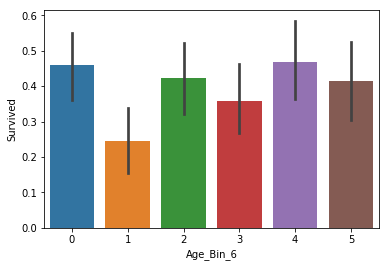

In [1856]:
sns.barplot(x = 'Age_Bin_6', y = 'Survived', data = train)

#### CUT FARE INTO 6 BINS & INTRODUCE FARE PER PERSON

To conver Fare to the same scale as the other features, I will cut Fare into 6 bins and label them from 1 to 6.

In [1857]:
label = LabelEncoder()
train['Fare_Bin_6'] = pd.qcut(train['Fare'], 6)
train['Fare_Bin_6'] = label.fit_transform(train['Fare_Bin_6'])

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6
0,0,3,0,1,0,7,1,1,0,1,1,0
1,1,1,1,1,0,71,2,1,0,3,4,5
2,1,3,1,0,0,7,1,0,1,2,2,0
3,0,3,0,0,0,8,1,0,1,1,4,1
4,1,2,1,1,0,30,2,1,0,3,0,4


In [1858]:
train = train.drop('Fare', axis = 1)

In [1859]:
train['Fare_Per_Person'] = train['Fare_Bin_6']/(train['Relatives']+1)
train['Fare_Per_Person'] = train['Fare_Per_Person'].astype(int)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6,Fare_Per_Person
0,0,3,0,1,0,1,1,0,1,1,0,0
1,1,1,1,1,0,2,1,0,3,4,5,2
2,1,3,1,0,0,1,0,1,2,2,0,0
3,0,3,0,0,0,1,0,1,1,4,1,1
4,1,2,1,1,0,2,1,0,3,0,4,2


Now we can explore the correlation between features.

In [1860]:
#Let's investigate the correlation between features
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6,Fare_Per_Person
Survived,1.000000,-0.391715,0.557355,0.002527,0.115753,0.108379,0.066079,-0.233854,0.360196,0.019677,0.381100,0.266711
Pclass,-0.391715,1.000000,-0.157170,0.075194,0.028940,-0.073219,0.063705,0.112776,-0.215061,-0.419903,-0.706013,-0.686186
Sex,0.557355,-0.157170,1.000000,0.128141,0.243629,0.114762,0.216804,-0.331195,0.433141,-0.068086,0.287322,0.073838
SibSp,0.002527,0.075194,0.128141,1.000000,0.410255,0.008347,0.861348,-0.646620,0.260256,-0.273047,0.373995,-0.279207
Parch,0.115753,0.028940,0.243629,0.410255,1.000000,-0.050570,0.816667,-0.574504,0.258564,-0.159158,0.357709,-0.254554
Embarked,0.108379,-0.073219,0.114762,0.008347,-0.050570,1.000000,-0.022888,-0.045918,0.070079,0.017244,0.098377,0.087963
Relatives,0.066079,0.063705,0.216804,0.861348,0.816667,-0.022888,1.000000,-0.729219,0.308728,-0.261448,0.435932,-0.318486
not_alone,-0.233854,0.112776,-0.331195,-0.646620,-0.574504,-0.045918,-0.729219,1.000000,-0.363315,0.156725,-0.539627,0.226417
Title,0.360196,-0.215061,0.433141,0.260256,0.258564,0.070079,0.308728,-0.363315,1.000000,0.018844,0.352020,0.066480
Age_Bin_6,0.019677,-0.419903,-0.068086,-0.273047,-0.159158,0.017244,-0.261448,0.156725,0.018844,1.000000,0.161166,0.312077


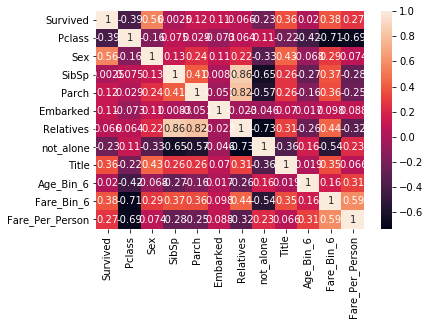

In [1861]:
sns.heatmap(train.corr(), annot = True)

Survived has a greater correlation with Pclass, Sex, no_alone, Fare_Per_Person, Title, Fare_Bin_6

 ### FINAL TRAINING SET

In [1862]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6,Fare_Per_Person
0,0,3,0,1,0,1,1,0,1,1,0,0
1,1,1,1,1,0,2,1,0,3,4,5,2
2,1,3,1,0,0,1,0,1,2,2,0,0
3,0,3,0,0,0,1,0,1,1,4,1,1
4,1,2,1,1,0,2,1,0,3,0,4,2


# Data Preprocessing (Test set)

Let's do the same data manipulation steps as with the training set. 

In [1863]:
test_df = pd.read_csv('DA_titanic_test.csv')

In [1864]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
1,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [1865]:
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)

In [1866]:
total_number_of_missing_values = test_df.isnull().sum().sort_values(ascending = False)
percentage = test_df.isnull().sum()/test_df.isnull().count()*100
percentage = (round(percentage,1)).sort_values(ascending = False)
missing_values = pd.concat([total_number_of_missing_values, percentage], axis = 1, keys = ['Total', '%'])

In [1867]:
missing_values

,Total,%
Age,47,17.6
Embarked,1,0.4
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
PassengerId,0,0.0


## RELATIVES

In [1868]:
test_df['Relatives'] = test_df['Parch'] + test_df['SibSp']
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
1,6,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0
3,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2


## NOT ALONE

In [1869]:
test_df.loc[test_df['Relatives'] > 0, 'not_alone'] = 0
test_df.loc[test_df['Relatives'] == 0, 'not_alone'] = 1
test_df['not_alone'] = test_df['not_alone'].astype(int)

## FARE

In [1870]:
test_df['Fare'].sort_values(ascending = False)

91     512.3292
106    262.3750
232    262.3750
41     247.5208
169    221.7792
128    211.5000
215    211.3375
110    164.8667
115    153.4625
194    153.4625
103    151.5500
117    133.6500
140    120.0000
244    120.0000
74     113.2750
206    113.2750
177    110.8833
186    110.8833
164    108.9000
176    106.4250
167     93.5000
158     91.0792
80      90.0000
85      90.0000
90      86.5000
163     86.5000
15      83.4750
83      83.4750
262     83.1583
11      82.1708
         ...   
94       7.7500
100      7.7500
105      7.7500
200      7.7333
56       7.7333
151      7.7250
20       7.6500
162      7.6292
255      7.5500
205      7.5500
156      7.5208
55       7.3125
29       7.2500
152      7.2500
238      7.2292
182      7.2292
12       7.2292
258      7.2292
217      7.2250
72       7.2250
9        7.2250
207      7.2250
196      7.0500
149      7.0500
249      6.9500
133      6.8583
50       6.7500
260      5.0000
150      0.0000
191      0.0000
Name: Fare, Length: 267,

In [1871]:
test_df = test_df[test_df.Fare <= 264]
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0
1,6,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0,1
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,1
3,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,0
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,0


## TITLES

In [1872]:
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Other": 6}

test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

test_df['Title'] = test_df['Title'].map(titles) # Encode titles with numbers

test_df = test_df.drop(['Name'], axis=1)

In [1873]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,4,1,female,35.0,1,0,53.1000,S,1,0,3
1,6,3,male,NaN,0,0,8.4583,Q,0,1,1
2,7,1,male,54.0,0,0,51.8625,S,0,1,1
3,8,3,male,2.0,3,1,21.0750,S,4,0,4
4,9,3,female,27.0,0,2,11.1333,S,2,0,3


## EMBARKED

In [1874]:
test_df['Embarked'] = test_df['Embarked'].fillna('S')

embarked = {"S": 1, "C": 2, "Q":3}
test_df['Embarked'] = test_df['Embarked'].map(embarked)

test_df['Embarked'] = test_df['Embarked'].astype(int)

In [1875]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,4,1,female,35.0,1,0,53.1000,1,1,0,3
1,6,3,male,NaN,0,0,8.4583,3,0,1,1
2,7,1,male,54.0,0,0,51.8625,1,0,1,1
3,8,3,male,2.0,3,1,21.0750,1,4,0,4
4,9,3,female,27.0,0,2,11.1333,1,2,0,3


## SEX

In [1876]:
sex = {"male": 0, "female": 1}
test_df['Sex'] = test_df['Sex'].map(sex)

test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,4,1,1,35.0,1,0,53.1000,1,1,0,3
1,6,3,0,NaN,0,0,8.4583,3,0,1,1
2,7,1,0,54.0,0,0,51.8625,1,0,1,1
3,8,3,0,2.0,3,1,21.0750,1,4,0,4
4,9,3,1,27.0,0,2,11.1333,1,2,0,3


## AGE

In [1877]:
test_df['Age'] = test_df['Age'].fillna(0)

test_df = test_df[test_df['Age'] != 0]

test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title
0,4,1,1,35.0,1,0,53.1000,1,1,0,3
2,7,1,0,54.0,0,0,51.8625,1,0,1,1
3,8,3,0,2.0,3,1,21.0750,1,4,0,4
4,9,3,1,27.0,0,2,11.1333,1,2,0,3
5,12,1,1,58.0,0,0,26.5500,1,0,1,2


In [1878]:
label = LabelEncoder()
test_df['Age_Bin_6'] = pd.qcut(test_df['Age'], 6)
test_df['Age_Bin_6'] = label.fit_transform(test_df['Age_Bin_6'])

test_df = test_df.drop('Age', axis = 1)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title,Age_Bin_6
0,4,1,1,1,0,53.1000,1,1,0,3,4
2,7,1,0,0,0,51.8625,1,0,1,1,5
3,8,3,0,3,1,21.0750,1,4,0,4,0
4,9,3,1,0,2,11.1333,1,2,0,3,2
5,12,1,1,0,0,26.5500,1,0,1,2,5


## FARE BIN

In [1879]:
label = LabelEncoder()
test_df['Fare_Bin_6'] = pd.qcut(test_df['Fare'], 6)
test_df['Fare_Bin_6'] = label.fit_transform(test_df['Fare_Bin_6'])

test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6
0,4,1,1,1,0,53.1000,1,1,0,3,4,4
2,7,1,0,0,0,51.8625,1,0,1,1,5,4
3,8,3,0,3,1,21.0750,1,4,0,4,0,3
4,9,3,1,0,2,11.1333,1,2,0,3,2,2
5,12,1,1,0,0,26.5500,1,0,1,2,5,3


In [1880]:
test_df = test_df.drop('Fare', axis = 1)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6
0,4,1,1,1,0,1,1,0,3,4,4
2,7,1,0,0,0,1,0,1,1,5,4
3,8,3,0,3,1,1,4,0,4,0,3
4,9,3,1,0,2,1,2,0,3,2,2
5,12,1,1,0,0,1,0,1,2,5,3


## FARE PER PERSON

In [1881]:
test_df['Fare_Per_Person'] = test_df['Fare_Bin_6']/(test_df['Relatives']+1)
test_df['Fare_Per_Person'] = test_df['Fare_Per_Person'].astype(int)

test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6,Fare_Per_Person
0,4,1,1,1,0,1,1,0,3,4,4,2
2,7,1,0,0,0,1,0,1,1,5,4,4
3,8,3,0,3,1,1,4,0,4,0,3,0
4,9,3,1,0,2,1,2,0,3,2,2,0
5,12,1,1,0,0,1,0,1,2,5,3,3


In [1882]:
test_df.isna().sum()

PassengerId        0
Pclass             0
Sex                0
SibSp              0
Parch              0
Embarked           0
Relatives          0
not_alone          0
Title              0
Age_Bin_6          0
Fare_Bin_6         0
Fare_Per_Person    0
dtype: int64

We have no missing values.

### FINAL TEST SET

In [1883]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Relatives,not_alone,Title,Age_Bin_6,Fare_Bin_6,Fare_Per_Person
0,4,1,1,1,0,1,1,0,3,4,4,2
2,7,1,0,0,0,1,0,1,1,5,4,4
3,8,3,0,3,1,1,4,0,4,0,3,0
4,9,3,1,0,2,1,2,0,3,2,2,0
5,12,1,1,0,0,1,0,1,2,5,3,3


# Build Machine Learning Model

In [1884]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict

In [1888]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test_df.drop("PassengerId", axis = 1)

In [1889]:
# logistic regression
logregression = LogisticRegression(random_state = 5)
logregression.fit(X_train, Y_train)

Y_pred = logregression.predict(X_test)

accuracy_logregression = round(logregression.score(X_train, Y_train) * 100, 2)

print('Logistic regression accuracy', accuracy_logregression)

Logistic regression accuracy 80.89


c:\users\péter\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1890]:
# Random forest

clf = RandomForestClassifier(n_estimators=100, random_state = 5)
clf.fit(X_train, Y_train)

Y_prediction = clf.predict(X_test)

clf.score(X_train, Y_train)
accuracy_random_forest = round(clf.score(X_train, Y_train) * 100, 2)

print('Random forest accuracy', accuracy_random_forest)

Random forest accuracy 93.09


In [1891]:
# Decision tree
decisiontree = DecisionTreeClassifier(random_state = 5) 
decisiontree.fit(X_train, Y_train)  

Y_pred = decisiontree.predict(X_test)  

decisiontree.score(X_train, Y_train)
accuracy_decisiontree = round(decisiontree.score(X_train, Y_train) * 100, 2)

print('Decision tree accuracy', accuracy_decisiontree)

Decision tree accuracy 93.09


In [1892]:
# Stochastic Gradient Descent

sgd = linear_model.SGDClassifier(max_iter=5, tol=None, random_state = 5)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

accuracy_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

print('SGD accuracy', accuracy_sgd)

SGD accuracy 68.5


c:\users\péter\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


<b> Random Forest and Decision Tree models performed the best so I will choose one of them. I decided to choose random forest beacuse it is more general and a good choice for machine learning in general. </b>

In [1894]:
from sklearn.model_selection import cross_val_score # To validate our results

randomforest = RandomForestClassifier(n_estimators = 100, random_state = 5)

scores = cross_val_score(randomforest, X_train, Y_train, cv = 10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72       0.72       0.82       0.92       0.79591837 0.75510204
 0.75510204 0.81632653 0.85416667 0.89583333]
Mean: 0.8052448979591837
Standard Deviation: 0.066149705074322


My Random forest model has an average of <b>80.52 % accuracy</b>, and the <b>standard deviation is 6.61 %</b>. Let's see the feature importance to decide which feature can be removed from the training set.

Let's validate the results with  <b>cross validation</b>.

### FEATURE IMPORTANCE

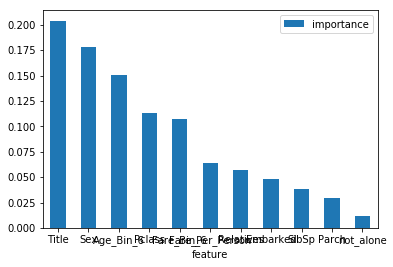

In [1895]:
model = RandomForestClassifier(n_estimators = 100, random_state = 5)
model.fit(X_train, Y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot = 0, )
plt.show()

In [1896]:
print(importance)

                 importance
feature                    
Title                 0.204
Sex                   0.178
Age_Bin_6             0.151
Pclass                0.113
Fare_Bin_6            0.107
Fare_Per_Person       0.064
Relatives             0.057
Embarked              0.048
SibSp                 0.038
Parch                 0.029
not_alone             0.012


Use the top 5 features

In [1897]:
X_train = X_train.drop(['Fare_Per_Person', 'Relatives', 'Embarked', 'SibSp', 'Parch', 'not_alone'], axis = 1)
X_train.head()

,Pclass,Sex,Title,Age_Bin_6,Fare_Bin_6
0,3,0,1,1,0
1,1,1,3,4,5
2,3,1,2,2,0
3,3,0,1,4,1
4,2,1,3,0,4


In [1898]:
X_test = X_test.drop(['Fare_Per_Person', 'Relatives', 'Embarked', 'SibSp', 'Parch', 'not_alone'], axis = 1)
X_test.head()

,Pclass,Sex,Title,Age_Bin_6,Fare_Bin_6
0,1,1,3,4,4
2,1,0,1,5,4
3,3,0,4,0,3
4,3,1,3,2,2
5,1,1,2,5,3


### GRIDSEARCH

In [1899]:
grid_parameter = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}

In [1900]:
gd_sr = GridSearchCV(estimator=model,
 param_grid = grid_parameter,
 scoring = 'accuracy',
 cv = 10,
 n_jobs = -1)

In [1901]:
gd_sr.fit(X_train[top5], Y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

c:\users\péter\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# FINAL MODEL

In [1902]:
finalmodel = RandomForestClassifier(n_estimators = 200, bootstrap = True, criterion= 'entropy', min_samples_leaf = 1, min_samples_split = 2, random_state = 5)

### CROSS VALIDATION

In [1903]:
accuracies = cross_val_score(estimator = finalmodel, X = X_train, y = Y_train, cv = 10)
accuracies
accuracies.mean()

0.8375714285714286

Final mean accuracy is <b>83.76 %</b>.

In [1904]:
finalmodel.fit(X_train, Y_train)
predictions = cross_val_predict(finalmodel, X_train, Y_train, cv = 10)

In [1905]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8041237113402062
Recall: 0.7878787878787878


<b>Precision:</b> Proportion of positives that are correctly identified (if my model predicts a passenger survived, it will be correct 80.41% of the time). 

<b>Recall:</b> Proportion of negatives that are correctly identified (if my model predicts a passenger dead, it will be correct 78.78% of the time). 

A good model has the same precision and recall (or almost the same). For my model, the difference between the two is 2.03 % which I think is a good result.  

## PREDICT PROBABILITY OF DEATH

We can predict probability with the _'predict_proba'_ method of the randomforest classifier. The predicted class probabilities of an input sample are computed as the mean predicted class probabilities of the trees in the forest. The class probability of a single tree is the fraction of samples of the same class in a leaf.

The output has two columns. Probability of value=0 and probability of value=1.

In our case, survived = 0 means that the passenger diead and survived = 1 means that the passenger has survived. So we need the first element of the predict_proba output.

In [1906]:
predictions = finalmodel.predict_proba(X_test)
print(predictions[:5])

[[0.075      0.925     ]
 [0.86455917 0.13544083]
 [0.01       0.99      ]
 [0.72518254 0.27481746]
 [0.40485119 0.59514881]]


In [1907]:
proba_death = []

for i in range(len(predictions)):
    death_proba = predictions[i][0]
    proba_death.append(death_proba)

In [1908]:
proba_death = np.array(proba_death)

In [1910]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Probability_of_Death': proba_death })

In [1912]:
output.to_csv('Titanic_death_predict_Lorincz.csv', index=False)

In [1913]:
Lorincz_pred = pd.read_csv('Titanic_death_predict_Lorincz.csv')

In [1914]:
Lorincz_pred.head()

,PassengerId,Probability_of_Death
0,4,0.075000
1,7,0.864559
2,8,0.010000
3,9,0.725183
4,12,0.404851
